In [1]:
#IMPORT LIBRARIES
import sys
import glob
import pandas as pd
import matplotlib.pyplot as plt, numpy as np
from scipy.interpolate import spline
from os import path

In [2]:
#INPUT PARAMETERS
max_iter = 13 #maximum number of iterations
i = 0 #starting number of iteration
tcounter = 0
number_of_files = 13 #number of files in directory
sourcePath = 'C:\\Users\\Inance\\Documents\\Thesis\\BURST\\all_inflation_burst_txt\\BURST'
list_of_source_files = glob.glob(sourcePath + '/*.ASC')
outpath = 'C:\\Users\\Inance\\Documents\\Thesis\\BURST\\all_inflation_burst_txt\\BURST\\BURST_FIGURES'
pressures = {} #initialize a dictionary
times ={} #initialize a dictionary
FINALpressures = {} #initialize a dictionary
FINALtimes ={} #initialize a dictionary

In [3]:
#GET SPECIFIC FILE & PRESSURE
def GetSourceFiles(list_of_source_files,i):
    print('GetSourceFiles')
    with open(list_of_source_files[i]) as source_file:
        print("file entered:",i+1)
        lst = [] 
        for line in source_file:
            lst.append([ float(x) for x in line.split()])
        time = np.array([ x[0] for x in lst]) #first row in file and make array
        void = np.array([ x[1] for x in lst]) #second row in file and make array
        pressure =(np.array([ x[2] for x in lst]))*-1 #etc. & change the sign of the imported pressure data
    return pressure,time

In [4]:
#Save the pressures in a dictionary
def SaveInDictionary (Pressure,time,i):
    print('SaveInDictionary')
    pressures[i]=Pressure
    times[i]=time
    return pressures,times

In [5]:
#Save the pressures in a dictionary
def SaveInNEWDictionary (Pressure,time,i):
    print('SaveInNEWDictionary')
    FINALpressures[i]=Pressure
    FINALtimes[i]=time
    return FINALpressures,FINALtimes

In [6]:
#NEW VERSION OF FilterData Function
def FilterData (p,t,i):
    print('FilterData')
    #INITIATE:
    data_points=int((t[0]-t[-1])/-0.02) #initial number of data points
    filtered_pressure = [] #create an empty list for the filtered pressure
    pNEW =[]
    counter = 0  #initiate counter
    time_new =[0,0.02] #these initial values are needed for the for-loop
    desired_nr_datapoints = int(8/0.02) #desired number of data points per graph
    print("nr_datapoints =",desired_nr_datapoints)
    
    #REMOVE NOISE ABOVE 8 BAR AND VALUES BEFORE ZERO PRESSURE:
    for j in range(data_points): 
        if p[j]<8: #filter out all garbage pressure data points above 8 bar
                if p[j]>0:
                    filtered_pressure.append(p[j]) #append the empty list ofsave all the new pressure values in new_pressure


    #FIND MAX INDEX VALUE, ALLOW ONLY 40 SECONDS BEFORE MAX INDEX:
    maxIndex =filtered_pressure.index(max(filtered_pressure))
    print("endIndex of Pressure before filter =", maxIndex)

    #LOOP TO FIND ONLY PRESSURE VALUES BETWEEN 40S END FINAL TIME:
    for i in range(maxIndex+1):
        if i >= maxIndex - desired_nr_datapoints:
            pNEW.append(filtered_pressure[i])
            counter += 1
        
    maxIndex = pNEW.index(max(pNEW))
    print("endIndex of Pressure after filter (pNEW) =", maxIndex)

    for i in range(counter-1):
        time_new[0]=0
        time_new[i+1]=time_new[i]+0.02 #add 0.02 to the previous value
        time_new.append(time_new) #append the time list
    del time_new[-1] #somehow a list of the entire time is formed at the end that should be removed

    TmaxIndex =time_new.index(max(time_new))
    print("endIndex of time_new =", TmaxIndex)
    #print("pNEW =",pNEW)
    
    return pNEW, time_new

In [7]:
def AveragePressure(finalP):
    P1=np.array(finalP[0])
    P2=np.array(finalP[1])
    P3=np.array(finalP[2])
    P4=np.array(finalP[3])
    P5=np.array(finalP[4])
    P6=np.array(finalP[5])
    P7=np.array(finalP[6])
    P8=np.array(finalP[7])
    P9=np.array(finalP[8])
    P10=np.array(finalP[9])
    P11=np.array(finalP[10])
    P12=np.array(finalP[11])
    P13=np.array(finalP[12])
    return (P1+P2+P3+P4+P5+P6+P7+P8+P9+P10+P11+P12+P13)/13

In [8]:
#Create Figures
def CreateGraphs(finalT, finalP,i):
    fig, ax = plt.subplots()        # generate figure with axes
    ax.scatter(finalT[i], finalP[i]) #create a scatter plot
    axis_font = {'size':'12'} #customize graph
    plt.ylabel("Pressure",**axis_font),plt.xlabel("Time",**axis_font) #name axes
    plt.show() #show graph
    fig.savefig(path.join(outpath,"dataname_{0}.png".format(i)))
    return

GetSourceFiles
file entered: 1
SaveInDictionary
FilterData
nr_datapoints = 400
endIndex of Pressure before filter = 1140
endIndex of Pressure after filter (pNEW) = 400
endIndex of time_new = 400
SaveInNEWDictionary


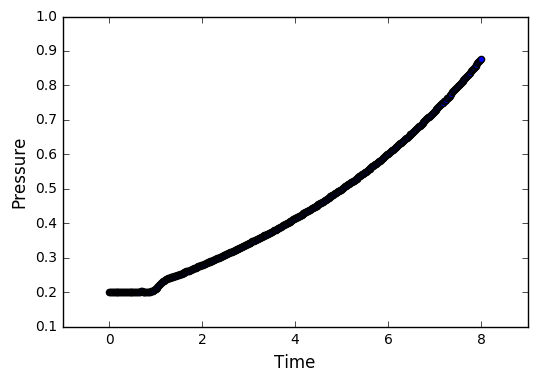

GetSourceFiles
file entered: 2
SaveInDictionary
FilterData
nr_datapoints = 400
endIndex of Pressure before filter = 5107
endIndex of Pressure after filter (pNEW) = 400
endIndex of time_new = 400
SaveInNEWDictionary


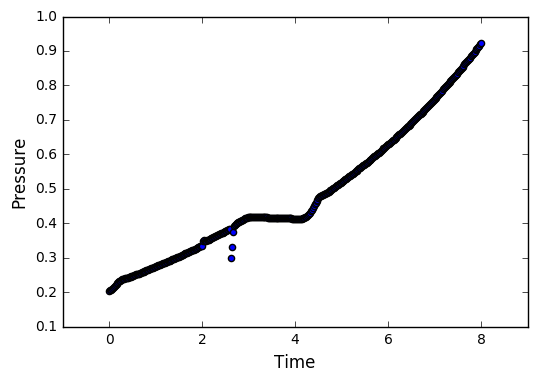

GetSourceFiles
file entered: 3
SaveInDictionary
FilterData
nr_datapoints = 400
endIndex of Pressure before filter = 533
endIndex of Pressure after filter (pNEW) = 400
endIndex of time_new = 400
SaveInNEWDictionary


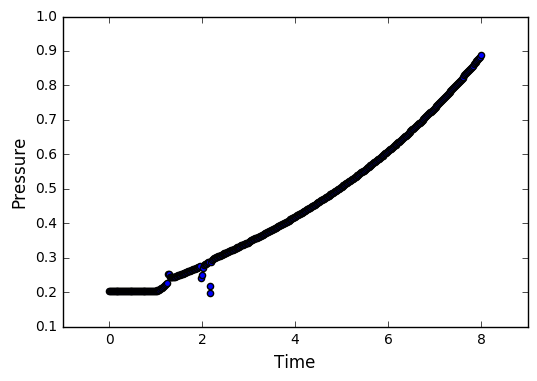

GetSourceFiles
file entered: 4
SaveInDictionary
FilterData
nr_datapoints = 400
endIndex of Pressure before filter = 3667
endIndex of Pressure after filter (pNEW) = 400
endIndex of time_new = 400
SaveInNEWDictionary


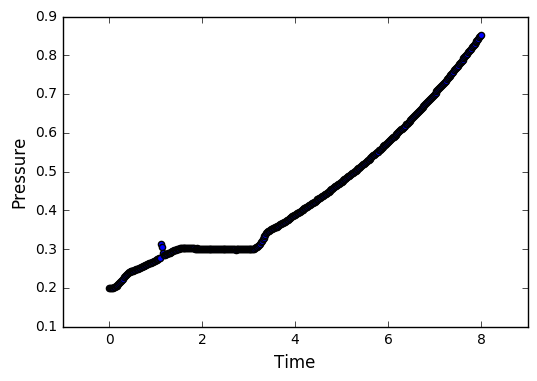

GetSourceFiles
file entered: 5
SaveInDictionary
FilterData
nr_datapoints = 400
endIndex of Pressure before filter = 465
endIndex of Pressure after filter (pNEW) = 400
endIndex of time_new = 400
SaveInNEWDictionary


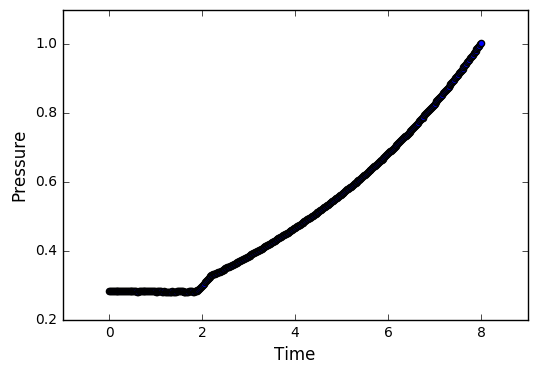

GetSourceFiles
file entered: 6
SaveInDictionary
FilterData
nr_datapoints = 400
endIndex of Pressure before filter = 3632
endIndex of Pressure after filter (pNEW) = 400
endIndex of time_new = 400
SaveInNEWDictionary


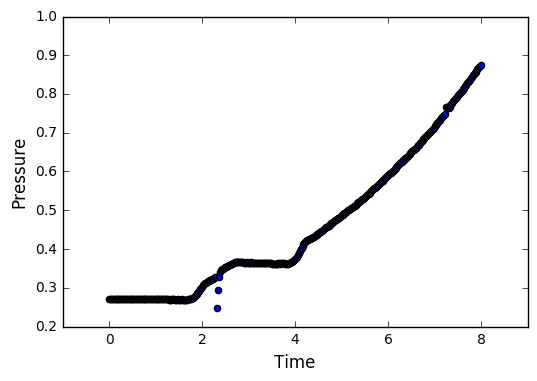

GetSourceFiles
file entered: 7
SaveInDictionary
FilterData
nr_datapoints = 400
endIndex of Pressure before filter = 629
endIndex of Pressure after filter (pNEW) = 400
endIndex of time_new = 400
SaveInNEWDictionary


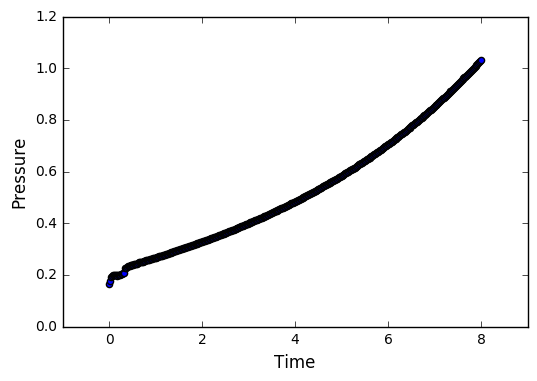

GetSourceFiles
file entered: 8
SaveInDictionary
FilterData
nr_datapoints = 400
endIndex of Pressure before filter = 831
endIndex of Pressure after filter (pNEW) = 400
endIndex of time_new = 400
SaveInNEWDictionary


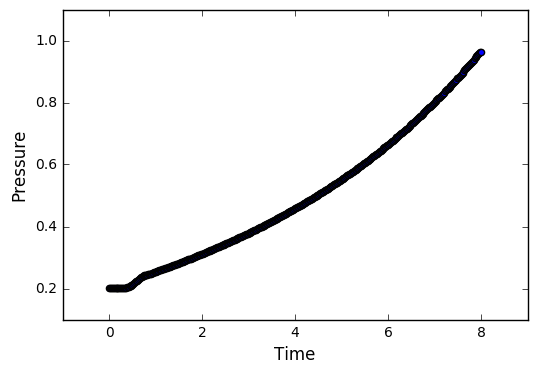

GetSourceFiles
file entered: 9
SaveInDictionary
FilterData
nr_datapoints = 400
endIndex of Pressure before filter = 642
endIndex of Pressure after filter (pNEW) = 400
endIndex of time_new = 400
SaveInNEWDictionary


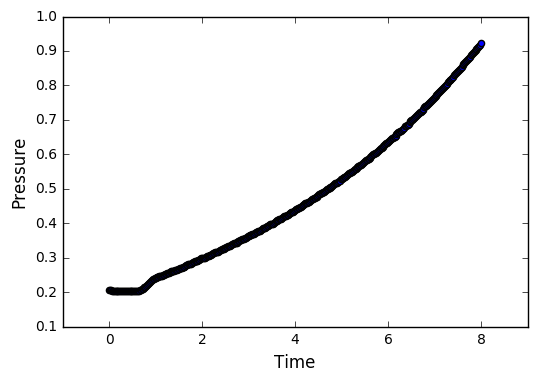

GetSourceFiles
file entered: 10
SaveInDictionary
FilterData
nr_datapoints = 400
endIndex of Pressure before filter = 533
endIndex of Pressure after filter (pNEW) = 400
endIndex of time_new = 400
SaveInNEWDictionary


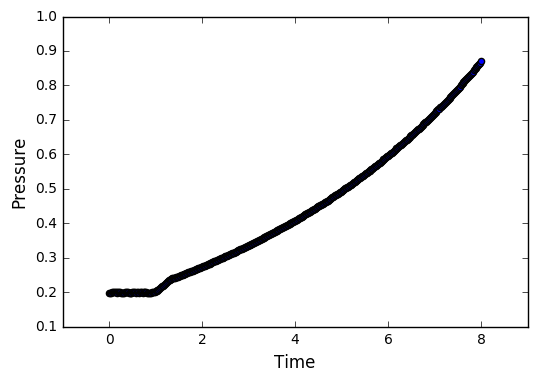

GetSourceFiles
file entered: 11
SaveInDictionary
FilterData
nr_datapoints = 400
endIndex of Pressure before filter = 447
endIndex of Pressure after filter (pNEW) = 400
endIndex of time_new = 400
SaveInNEWDictionary


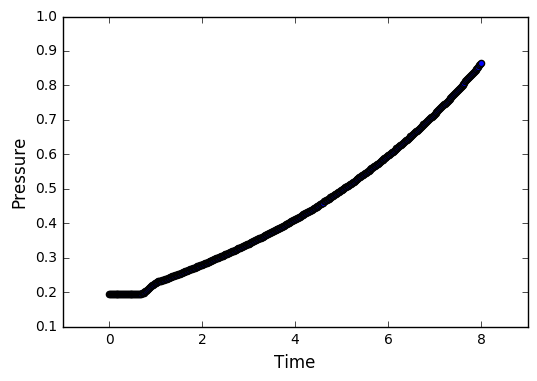

GetSourceFiles
file entered: 12
SaveInDictionary
FilterData
nr_datapoints = 400
endIndex of Pressure before filter = 580
endIndex of Pressure after filter (pNEW) = 400
endIndex of time_new = 400
SaveInNEWDictionary


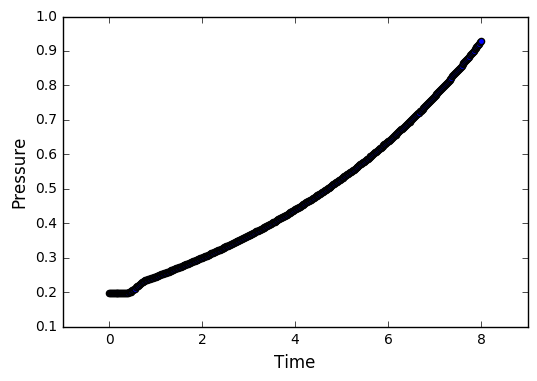

GetSourceFiles
file entered: 13
SaveInDictionary
FilterData
nr_datapoints = 400
endIndex of Pressure before filter = 657
endIndex of Pressure after filter (pNEW) = 400
endIndex of time_new = 400
SaveInNEWDictionary


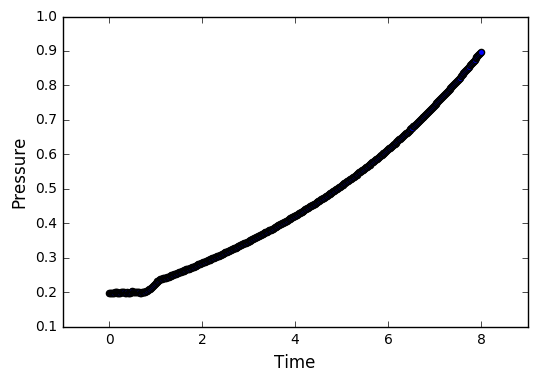

AVERAGE GRAPH OF ALL 13 PRESSURES FOR 8s


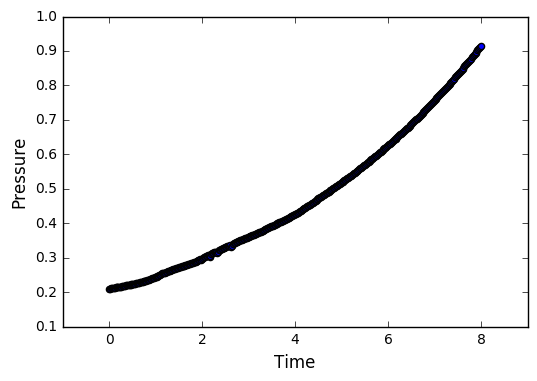

In [9]:
#MAIN!!
P = list()
while (i <= number_of_files and i!=max_iter):
    pressure,time = GetSourceFiles(list_of_source_files,i) #return pressure and time from specific file
    pressures, times = SaveInDictionary (pressure,time,i)#save pressure and time in the dictionaries
    filtered_pressure,changed_time = FilterData(pressures[i],times[i],i)
    finalP, finalT = SaveInNEWDictionary(filtered_pressure,changed_time,i)#save pressure and time in the dictionaries
    CreateGraphs(finalT, finalP,i)
    i+=1 #increment i to loop

FINAL_P = AveragePressure(finalP)
FINAL_T = finalT[0]
print("AVERAGE GRAPH OF ALL 13 PRESSURES FOR 8s")
fig, ax = plt.subplots()# generate figure with axes
ax.scatter(FINAL_T, FINAL_P) #create a scatter plot
axis_font = {'size':'12'} #customize graph
plt.ylabel("Pressure",**axis_font),plt.xlabel("Time",**axis_font) #name axes
plt.show() #show graph
fig.savefig(path.join(outpath,"dataname_{0}.png".format(i)))



In [10]:
#WRITE THE FINAL AVERAGE OF ALL THE PRESSURES TO A TEXT FILE
with open ('final_average_BURST_CRUSH_data.txt','w') as f:
    for i in range(len(FINAL_T)):
        f.write(str(FINAL_T[i-1])+','+str(FINAL_P[i-1])+'\n')
with open('final_average_BURST_CRUSH_data.txt', 'r') as fin:
    data = fin.read().splitlines(True)
with open('final_average_BURST_CRUSH_data.txt', 'w') as fout:
    fout.writelines(data[1:])
f.close()